<a href="https://colab.research.google.com/github/HongyuJiang/Dialogue-Generation-with-Persona---A-Note/blob/master/use_chat_history_to_predict_user's_answer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##### Copyright 2018 The TensorFlow Authors.

In [0]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.



# Text generation using a RNN with eager execution


<table class="tfo-notebook-buttons" align="left">
<td>
<a target="_blank" href="https://www.tensorflow.org/tutorials/sequences/text_generation"><img src="https://www.tensorflow.org/images/tf_logo_32px.png" />View on TensorFlow.org</a>
</td><td>
<a target="_blank"  href="https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/sequences/text_generation.ipynb">
    <img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>  
</td><td>
<a target="_blank"  href="https://github.com/tensorflow/docs/blob/master/site/en/tutorials/sequences/text_generation.ipynb"><img width=32px src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a></td></table>

## Setup

In [0]:
from __future__ import absolute_import, division, print_function

import tensorflow as tf

import numpy as np
import os
import time

tf.compat.v1.disable_eager_execution()

### Import TensorFlow and other libraries

In [0]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
!ls "/content/drive/My Drive/dark_learning/chatting_records.txt"

'/content/drive/My Drive/dark_learning/chatting_records.txt'


### Download the Shakespeare dataset

Change the following line to run this code on your own data.

In [0]:
path_to_file = '/content/drive/My Drive/dark_learning/chatting_records2.txt'

### Read the data

First, look in the text.

In [0]:
# Read, then decode for py2 compat.
text = open(path_to_file, 'rb').read().decode(encoding='utf-8').replace('\ufeff','').replace('[图片]', '嫐').replace('[表情]', '嬲') 
# length of text is the number of characters in it
print ('Length of text: {} characters'.format(len(text)))

Length of text: 2610569 characters


In [0]:
lines = text.split('\r\n')
lines_len = len(lines)
name_header = dict()
rounds = []

content = ''
date = ''
time = ''
speaker = ''

for i in range(0, lines_len - 4):
    
  spaceNum = lines[i].count(' ')
  maoNum = lines[i].count(':')

  if spaceNum == 2 and maoNum == 2:
    
    meta = dict()
    #print(speaker + ': ' + content + '\n')
    
    round_info = lines[i].split(' ')
    date = round_info[0]
    time = round_info[1]
    speaker = round_info[2]
    
    meta['date'] = date
    meta['time'] = time
    meta['speaker'] = speaker
    meta['content'] = content
    
    rounds.append(meta)
    
    content = ''
  else:
    meta['content'] += lines[i].replace('\r\n','')
  
  if speaker in name_header:
    name_header[speaker] += 1
  else:
    name_header[speaker] = 1
  #print(speaker + ': ' + content + ' | ' + date)

In [0]:
for i in range(0, len(rounds)):
  speaker = rounds[i]['speaker']
  if speaker in {'蒋宏宇','蒋有毒','蒋有毒客服','有毒客服','略略略','🐷'}:
    rounds[i]['speaker'] = '我'
  else: 
    if speaker == '啦':
      rounds[i]['speaker'] = '你'
      

In [0]:
contex_speaker = 'NULL'
summerized_rounds = []


for i in range(0, len(rounds)):
  speaker = rounds[i]['speaker']
  if speaker == contex_speaker:
    context_meta['content'] += ' ' + rounds[i]['content']
  else:
    if contex_speaker != 'NULL':
      summerized_rounds.append(context_meta)
      
    contex_speaker = speaker
    context_meta = dict()
    context_meta['date'] = rounds[i]['date']
    context_meta['time'] = rounds[i]['time']
    context_meta['speaker'] = rounds[i]['speaker']
    context_meta['content'] = rounds[i]['content']

In [0]:
print(len(summerized_rounds))

39927


In [0]:
!pip install colored
import colored
from colored import stylize


In [0]:

Lan = colored.fg("white") + colored.bg("blue")

Yu = colored.fg("white") + colored.bg("red")

for i in range(19950,19960):
  if i % 2 == 0:
    print(stylize(summerized_rounds[i], Yu))
  else:
    print(stylize(summerized_rounds[i], Lan))

{'date': '2019-01-04', 'time': '0:57:39', 'speaker': '你', 'content': '我给你鼓掌 然后 给你huo'}
{'date': '2019-01-04', 'time': '0:57:56', 'speaker': '我', 'content': '妈卖批 你个瓜娃子 你要遭'}
{'date': '2019-01-04', 'time': '0:58:09', 'speaker': '你', 'content': '嫐'}
{'date': '2019-01-04', 'time': '0:58:10', 'speaker': '我', 'content': '瓜批云'}
{'date': '2019-01-04', 'time': '0:58:22', 'speaker': '你', 'content': '你说的拿杯子的嘛 我以为你想huo'}
{'date': '2019-01-04', 'time': '0:58:36', 'speaker': '我', 'content': '给你喝的'}
{'date': '2019-01-04', 'time': '0:58:42', 'speaker': '你', 'content': '既然你不想喝'}
{'date': '2019-01-04', 'time': '0:58:45', 'speaker': '我', 'content': '张兰云一饮而尽'}
{'date': '2019-01-04', 'time': '0:58:48', 'speaker': '你', 'content': '那你拿去下面'}
{'date': '2019-01-04', 'time': '0:58:55', 'speaker': '我', 'content': '变态！ 死变态！'}


In [0]:
# The unique characters in the file
vocab = sorted(set(text))
print ('{} unique characters'.format(len(vocab)))

3339 unique characters


## Process the text

### Vectorize the text

Before training, we need to map strings to a numerical representation. Create two lookup tables: one mapping characters to numbers, and another for numbers to characters.

In [0]:
# Creating a mapping from unique characters to indices
#char2idx = {u:i for i, u in enumerate(vocab)}

char2idx = dict()
idx2char = dict()

idx2char[1] = 'EOF'

for i,u in enumerate(vocab):
  char2idx[u] = i + 2
  idx2char[i + 2] = u

for i in range(len(summerized_rounds)):
  
  if len(summerized_rounds[i]['content']) > 50:
    summerized_rounds[i]['content'] = ''
  temp_str = ''
  for j,u in enumerate(summerized_rounds[i]['content']):
    temp_str += ' ' + str(char2idx[u])
  summerized_rounds[i]['content_intCode'] = temp_str
  #summerized_rounds[i]['content'] = '' #clear cache
  
print(len(summerized_rounds))

39927


In [0]:
for i in range(10):
  print(summerized_rounds[i])

{'date': '2018-09-08', 'time': '8:20:40', 'speaker': '你', 'content': '师兄 你什么方向啊?', 'content_intCode': ' 1058 344 5 281 219 173 1502 575 675 36'}
{'date': '2018-09-08', 'time': '8:21:02', 'speaker': '我', 'content': '可视化方向 新生见面会你好像没来吧', 'content_intCode': ' 556 2736 478 1502 575 5 1501 2031 2732 3179 255 281 859 337 1761 1593 584'}
{'date': '2018-09-08', 'time': '8:50:28', 'speaker': '你', 'content': '科学可视化跟信息可视化都是吗? 嫐', 'content_intCode': ' 2214 930 556 2736 478 2894 308 1201 556 2736 478 3031 1528 578 36 5 912'}
{'date': '2018-09-08', 'time': '11:01:50', 'speaker': '我', 'content': '都做过点 主要还是做可视分析 嫐', 'content_intCode': ' 3031 325 2956 1908 5 168 2729 2962 1528 325 556 2736 414 1602 5 912'}
{'date': '2018-09-08', 'time': '12:00:17', 'speaker': '你', 'content': '师兄我以后可能是做移动通信方面的，这边实验室的师兄说我学的跟你比较像，师兄以后多指教 嫐', 'content_intCode': ' 1058 344 1272 236 573 556 2477 1528 325 2223 460 2987 308 1502 3179 2091 3325 2963 2951 949 3254 954 2091 1058 344 2797 1272 930 2091 2894 281 1726 2933 337 3325 1

### The prediction task

In [0]:
PAD = 0
EOS = 1

training_data = []

for i in range(0, len(summerized_rounds)-1, 2):
  meta = dict()
  inp = summerized_rounds[i]['content']
  out = summerized_rounds[i + 1]['content']
  code_input = summerized_rounds[i]['content_intCode'].split(' ')
  code_output = summerized_rounds[i+1]['content_intCode'].split(' ')
  meta['input'] = code_input[1:-1]
  meta['output'] = code_output[1:-1]
  
  inp_emojis_count = inp.count('嬲')
  out_emojis_count = out.count('嬲')
  
  inp_images_count = inp.count('嫐')
  out_images_count = out.count('嫐')
  
  inp_modal_count = inp.count('哈')
  out_modal_count = out.count('哈')
  
  inp_space_count = inp.count(' ')
  out_space_count = out.count(' ')
  
  inp_useless_count = inp_emojis_count + inp_images_count + inp_space_count + inp_modal_count
  out_useless_count = out_emojis_count + out_images_count + out_space_count + out_modal_count
  
  if inp_useless_count < len(inp) and out_useless_count < len(out) and len(inp) > 0 and len(out) > 0:
    training_data.append(meta)
  #summerized_rounds[i]['content'] = ''
  #summerized_rounds[i+1]['content'] = ''
  
for i in range(len(training_data)):
  for j in range(len(training_data[i]['input'])):
    training_data[i]['input'][j] = int(training_data[i]['input'][j])
  for j in range(len(training_data[i]['output'])):
    training_data[i]['output'][j] = int(training_data[i]['output'][j])
    
    
print(len(training_data))

14285


In [0]:

tf.reset_default_graph()
sess = tf.InteractiveSession()

vocab_size = len(vocab)
input_embedding_size = 128

encoder_hidden_units = 20
decoder_hidden_units = encoder_hidden_units * 2

encoder_inputs = tf.placeholder(shape=(None, None), dtype=tf.int32, name='encoder_inputs')
encoder_inputs_length = tf.placeholder(shape=(None,), dtype=tf.int32, name='encoder_inputs_length')
decoder_inputs_length = tf.placeholder(shape=(None,), dtype=tf.int32, name='decoder_inputs_length')
decoder_targets = tf.placeholder(shape=(None, None), dtype=tf.int32, name='decoder_targets')

The `batch` method lets us easily convert these individual characters to sequences of the desired size. 

In [0]:
embeddings = tf.Variable(tf.random_uniform([vocab_size, input_embedding_size], -1.0, 1.0), dtype=tf.float32)

encoder_inputs_embedded = tf.nn.embedding_lookup(embeddings, encoder_inputs)


Instructions for updating:
Colocations handled automatically by placer.


For each sequence, duplicate and shift it to form the input and target text by using the `map` method to apply a simple function to each batch:

In [0]:
from tensorflow.contrib.rnn import LSTMCell, LSTMStateTuple

encoder_cell = LSTMCell(encoder_hidden_units)

((encoder_fw_outputs,
  encoder_bw_outputs),
 (encoder_fw_final_state,
  encoder_bw_final_state)) = (
    tf.nn.bidirectional_dynamic_rnn(cell_fw=encoder_cell,
                                    cell_bw=encoder_cell,
                                    inputs=encoder_inputs_embedded,
                                    sequence_length=encoder_inputs_length,
                                    dtype=tf.float32, time_major=True)
    )


Instructions for updating:
This class is equivalent as tf.keras.layers.LSTMCell, and will be replaced by that in Tensorflow 2.0.
Instructions for updating:
Please use `keras.layers.Bidirectional(keras.layers.RNN(cell))`, which is equivalent to this API
Instructions for updating:
Please use `keras.layers.RNN(cell)`, which is equivalent to this API
Instructions for updating:
Use tf.cast instead.


In [0]:

encoder_outputs = tf.concat((encoder_fw_outputs, encoder_bw_outputs), 2)

encoder_final_state_c = tf.concat(
    (encoder_fw_final_state.c, encoder_bw_final_state.c), 1)

encoder_final_state_h = tf.concat(
    (encoder_fw_final_state.h, encoder_bw_final_state.h), 1)

encoder_final_state = LSTMStateTuple(
    c=encoder_final_state_c,
    h=encoder_final_state_h
)

Print the first examples input and target values:

In [0]:
decoder_cell = LSTMCell(decoder_hidden_units)

encoder_max_time, batch_size = tf.unstack(tf.shape(encoder_inputs))

decoder_lengths = decoder_inputs_length #必须加上PAD和EOS Tensor才会匹配
#decoder_lengths = encoder_inputs_length

W = tf.Variable(tf.random_uniform([decoder_hidden_units, vocab_size], -1, 1), dtype=tf.float32)
b = tf.Variable(tf.zeros([vocab_size]), dtype=tf.float32)


In [0]:
assert EOS == 1 and PAD == 0

eos_time_slice = tf.ones([batch_size], dtype=tf.int32, name='EOS')
pad_time_slice = tf.zeros([batch_size], dtype=tf.int32, name='PAD')

eos_step_embedded = tf.nn.embedding_lookup(embeddings, eos_time_slice)
pad_step_embedded = tf.nn.embedding_lookup(embeddings, pad_time_slice)

In [0]:
def loop_fn_initial():
    initial_elements_finished = (0 >= decoder_lengths)  # all False at the initial step
    initial_input = eos_step_embedded
    initial_cell_state = encoder_final_state
    initial_cell_output = None
    initial_loop_state = None  # we don't need to pass any additional information
    return (initial_elements_finished,
            initial_input,
            initial_cell_state,
            initial_cell_output,
            initial_loop_state)
  
def loop_fn_transition(time, previous_output, previous_state, previous_loop_state):

    def get_next_input():
        output_logits = tf.add(tf.matmul(previous_output, W), b)
        prediction = tf.argmax(output_logits, axis=1)
        next_input = tf.nn.embedding_lookup(embeddings, prediction)
        return next_input
    
    elements_finished = (time >= decoder_lengths) # this operation produces boolean tensor of [batch_size]
                                                  # defining if corresponding sequence has ended

    finished = tf.reduce_all(elements_finished) # -> boolean scalar
    input = tf.cond(finished, lambda: pad_step_embedded, get_next_input)
    state = previous_state
    output = previous_output
    loop_state = None

    return (elements_finished, 
            input,
            state,
            output,
            loop_state)
  

In [0]:
def loop_fn(time, previous_output, previous_state, previous_loop_state):
    if previous_state is None:    # time == 0
        assert previous_output is None and previous_state is None
        return loop_fn_initial()
    else:
        return loop_fn_transition(time, previous_output, previous_state, previous_loop_state)

decoder_outputs_ta, decoder_final_state, _ = tf.nn.raw_rnn(decoder_cell, loop_fn)
decoder_outputs = decoder_outputs_ta.stack()


decoder_max_steps, decoder_batch_size, decoder_dim = tf.unstack(tf.shape(decoder_outputs))
decoder_outputs_flat = tf.reshape(decoder_outputs, (-1, decoder_dim))
decoder_logits_flat = tf.add(tf.matmul(decoder_outputs_flat, W), b)
decoder_logits = tf.reshape(decoder_logits_flat, (decoder_max_steps, decoder_batch_size, vocab_size))

decoder_prediction = tf.argmax(decoder_logits, 2)

Each index of these vectors are processed as one time step. For the input at time step 0, the model receives the index for "F" and trys to predict the index for "i" as the next character. At the next timestep, it does the same thing but the `RNN` considers the previous step context in addition to the current input character.

In [0]:
stepwise_cross_entropy = tf.nn.softmax_cross_entropy_with_logits(
    labels=tf.one_hot(decoder_targets, depth=vocab_size, dtype=tf.float32),
    logits=decoder_logits,
)

loss = tf.reduce_mean(stepwise_cross_entropy)
train_op = tf.train.AdamOptimizer().minimize(loss)

sess.run(tf.global_variables_initializer())



Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



### Create training batches

We used `tf.data` to split the text into manageable sequences. But before feeding this data into the model, we need to shuffle the data and pack it into batches.

In [0]:
def batchFun(tranining_data, max_sequence_length=None):
    
    inputs_lengths = [(len(seq['input']) + 1) for seq in tranining_data]
    outputs_lengths = [(len(seq['output']) + 1) for seq in tranining_data]
    
    batch_size = len(tranining_data)
    
    max_lens = 0
    
    #if max_sequence_length is None:
    max_inputs_length = max(inputs_lengths)
    max_outputs_length = max(outputs_lengths)
    
    #print(max_inputs_length, max_outputs_length)
        
    #print(batch_size, max_inputs_length, max_outputs_length)
  
    if max_inputs_length > max_outputs_length:
      max_lens = max_inputs_length
    else:
      max_lens = max_outputs_length
    
    inputs_batch_major = np.zeros(shape=[batch_size, max_inputs_length], dtype=np.int32) # == PAD
    
    outputs_batch_major = np.zeros(shape=[batch_size, max_outputs_length], dtype=np.int32) # == PAD
    
    
    #给回答增加PAD和EOS
    
    for i, seq in enumerate(tranining_data):
        for j, element in enumerate(seq['input']):
            inputs_batch_major[i, j] = element
        inputs_batch_major[i, max_inputs_length - 1]  =  EOS
            
    for i, seq in enumerate(tranining_data):
        for j, element in enumerate(seq['output']):
            outputs_batch_major[i, j] = element
        outputs_batch_major[i, max_outputs_length - 1]  =  EOS
     
    # [batch_size, max_time] -> [max_time, batch_size]
    inputs_time_major = inputs_batch_major.swapaxes(0, 1)
    outputs_time_major = outputs_batch_major.swapaxes(0, 1)

    return inputs_time_major, outputs_time_major, inputs_lengths, outputs_lengths


## Build The Model

Use `tf.keras.Sequential` to define the model. For this simple example three layers are used to define our model:

* `tf.keras.layers.Embedding`: The input layer. A trainable lookup table that will map the numbers of each character to a vector with `embedding_dim` dimensions;
* `tf.keras.layers.GRU`: A type of RNN with size `units=rnn_units` (You can also use a LSTM layer here.)
* `tf.keras.layers.Dense`: The output layer, with `vocab_size` outputs.

In [0]:
import random

print(len(training_data))

def next_feed():
    global startNum
    global endNum
  
    _batch = training_data[10000: 11000]
    encoder_inputs_, decoder_targets_, encoder_input_lengths_, encoder_output_lengths_ = batchFun(_batch)
    
    #print(len(encoder_inputs_[0]), len(decoder_targets_[0]))
    
    if endNum < len(training_data):
      startNum += 1000
      endNum += 1000
    else:
      startNum = 0
      endNum = 1000

    return {
        encoder_inputs: encoder_inputs_,
        encoder_inputs_length: encoder_input_lengths_,
        decoder_targets: decoder_targets_,
        decoder_inputs_length: encoder_output_lengths_,
    }

14285


Next define a function to build the model.

Use `CuDNNGRU` if running on GPU.  

In [0]:
loss_track = []

max_batches = 3001
batches_in_epoch = 500

startNum = 0
endNum = 1000

try:
    for batch in range(max_batches):
        fd = next_feed()
        _, l = sess.run([train_op, loss], fd)
        loss_track.append(l)

        if batch % batches_in_epoch == 0:
            print('batch {} ---------------------------------------'.format(batch))
            print('  minibatch loss: {}'.format(sess.run(loss, fd)))
            predict_ = sess.run(decoder_prediction, fd)
            for i, (inp, pred) in enumerate(zip(fd[encoder_inputs].T, predict_.T)):
              print('sample {}:'.format(i + 1))
              myStr = ''
              for j in range(len(inp)):
                if inp[j] != 0 and inp[j] != 1:
                  myStr += idx2char[inp[j]]
              print('Q >:{}|'.format(myStr))
              myStr = ''
              for j in range(len(pred)):
                if pred[j] != 0 and pred[j] != 1:
                  myStr += idx2char[pred[j]]
              print('A >:{}|'.format(myStr))
              if i >= 5:
                  break
            print('-----------------------------------------------------')
            
except KeyboardInterrupt:
    print('training interrupted')

batch 0 ---------------------------------------
  minibatch loss: 8.151241302490234
sample 1:
Q >:所以事情就说得通|
A >:播徊辗耶饲處處授授|
sample 2:
Q >:我也觉得你挺优秀的 不过你也不想讲究 将就 毕竟遇到一个很合适的人概率比较|
A >:嗦栋b蜷毅蜷隆虚筷筷名饮|
sample 3:
Q >:我觉得还是我们两个在一起比较|
A >:凰凰撵咸挺与宴杀啦胁府朋焖怕機夕罩雀雀淹|
sample 4:
Q >:我不会为了身体的愉悦 去舍弃精神的愉悦|
A >:凰凰撵咸挺与宴贯促肝腌伪践蜂雲嵌嵌磨杰小深耳寒倦|
sample 5:
Q >:确实不排除这种可能性 那就需要责任心去干涉|
A >:谐戒驱销遁笑端箕百塑较透弯蚀攀咏叛喱活|
sample 6:
Q >:是的|
触哦栋楼姿惧姿打￢昊書它酌|
-----------------------------------------------------
batch 500 ---------------------------------------
  minibatch loss: 6.323128700256348
sample 1:
Q >:所以事情就说得通|
A >:我我   |
sample 2:
Q >:我也觉得你挺优秀的 不过你也不想讲究 将就 毕竟遇到一个很合适的人概率比较|
A >:对对给 |
sample 3:
Q >:我觉得还是我们两个在一起比较|
A >:你你你   哈 哈  哈   哈  |
sample 4:
Q >:我不会为了身体的愉悦 去舍弃精神的愉悦|
A >:哈哈哈               |
sample 5:
Q >:确实不排除这种可能性 那就需要责任心去干涉|
A >:这要不说的的 不不不不不的的 不|
sample 6:
Q >:是的|
A >:我哈  哈  |
-----------------------------------------------------
batch 1000 ---------------------------------------
  minibatch loss: 5.362196922302246
sample 1

In [0]:
test_data = []

a1 = dict()
a1['input'] = [char2idx['哈'], char2idx['哈']]
a1['output'] = [char2idx['呵'], char2idx['呵']]

a3 = dict()
a3['input'] = [char2idx['兰'], char2idx['妹'], char2idx['妹']]
a3['output'] = [char2idx['爪'], char2idx['子']]

a2 = dict()
a2['input'] = [char2idx['我'], char2idx['爱'], char2idx['你']] 
a2['output'] = [char2idx['妈'], char2idx['卖'], char2idx['批']]

test_data.append(a1)
test_data.append(a2)
test_data.append(a3)


_inputs, _targets, input_lengths, output_lengths = batchFun(test_data) 
    
_batch = {
  encoder_inputs: _inputs,
  encoder_inputs_length: input_lengths,
  decoder_targets: _targets,
  decoder_inputs_length: output_lengths,
}

predict_ = sess.run(decoder_prediction, _batch)
#for i, (inp, pred) in enumerate(zip(fd[encoder_inputs].T, predict_.T)):

for i, (inp,anw, pred) in enumerate(zip(_batch[encoder_inputs].T, _batch[decoder_targets].T, predict_.T)):
  print('样本 {}:'.format(i + 1))
  myStr = '' 
  for j in range(len(inp)):
    if inp[j] != 0 and inp[j] != 1:
      myStr += idx2char[inp[j]]
  print('问题 >:{}|'.format(myStr))
  myStr = ''
  for j in range(len(anw)):
    if anw[j] != 0 and anw[j] != 1:
      myStr += idx2char[anw[j]]
  print('正确答案 >:{}|'.format(myStr))
  myStr = ''
  for j in range(len(pred)):
    if pred[j] != 0 and pred[j] != 1:
      myStr += idx2char[pred[j]]
  print('预测 >:{}|'.format(myStr))
  if i >= 20:
    break



样本 1:
问题 >:哈哈|
正确答案 >:呵呵|
预测 >:  发|
样本 2:
问题 >:我爱你|
正确答案 >:妈卖批|
预测 >:哼我望|
样本 3:
问题 >:兰妹妹|
正确答案 >:爪子|
预测 >:电日|


loss 2.1842 after Tensor("mul:0", shape=(), dtype=int32) examples (batch_size=Tensor("unstack:1", shape=(), dtype=int32))


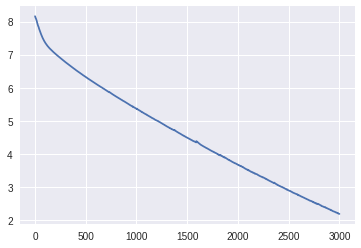

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(loss_track)
print('loss {:.4f} after {} examples (batch_size={})'.format(loss_track[-1], len(loss_track)*batch_size, batch_size))